In [39]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/")
import GeoMig
#importlib.reload(GeoMig)
importlib.reload(GeoMig)
import numpy as np
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 2, linewidth= 130, suppress =  True)


test = GeoMig.GeoMigSim_pro2(c_o = np.float32(-0.58888888),range = np.float32(6))

#print (ref_p)

test.create_regular_grid_2D(0,10,0,10,100,100)
test.theano_set_2D()

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [40]:
test.a.eval()

array(6.0, dtype=float32)

In [59]:
layer_1 = np.array([[1,7],[5,7],[6,7], [9,8]], dtype = "float32")

layer_2 = np.array([[1,1],[5,1],[9,1]], dtype = "float32")

dip_pos_1 = np.array([2,4,], dtype = "float32")
dip_pos_2 = np.array([6.,3.], dtype = "float32")
dip_pos_3 = np.array([8,4], dtype = "float32")
dip_angle_1 = float(260)
dip_angle_2 = float(70)

layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1,dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float32")
#print (dips_angles)
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
dips_angles.dtype

dtype('float32')

In [60]:
dips

array([[ 2.,  4.],
       [ 6.,  3.]], dtype=float32)

In [61]:
rest = rest.astype("float32")
ref = ref.astype("float32")
dips = dips.astype("float32")
dips_angles = dips_angles.astype("float32")
type(dips_angles)

numpy.ndarray

In [62]:
dips;

In [63]:
%%timeit
test.geoMigueller(dips,dips_angles,rest, ref)

100 loops, best of 3: 4.74 ms per loop


In [64]:
sol = test.geoMigueller(dips,dips_angles,rest, ref)[0]

In [65]:
np.set_printoptions(precision = 2 ,linewidth= 130, suppress =  True)

test.geoMigueller(dips,dips_angles,rest, ref)[0]

array([-0.26, -0.26, -0.26, ..., -0.  ,  0.  ,  0.01])

[ 1.83  3.02] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


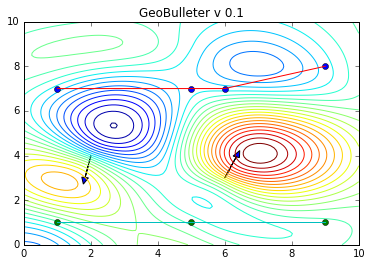

In [66]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(100,100) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

In [58]:
# random
layers = [np.random.uniform(0,10,(10,2)) for i in range(100)]
dips = np.random.uniform(0,10, (60,2))
dips_angles = np.random.normal(90,10, 60)
rest = (np.vstack((i[1:] for i in layers)))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
rest;

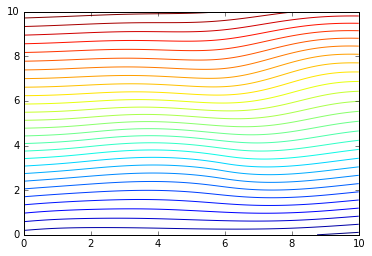

In [48]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.contour( sol.reshape(100,100) ,30,extent = (0,10,0,10) )

# CPU

In [17]:
%%timeit
sol = test.geoMigueller(dips,dips_angles,rest, ref)[0]

1 loop, best of 3: 5.81 s per loop


In [18]:
test.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:562
  Time in 5 calls to Function.__call__: 2.937774e+01s
  Time in Function.fn.__call__: 2.937736e+01s (99.999%)
  Time in thunks: 2.934835e+01s (99.900%)
  Total compile time: 1.559712e+00s
    Number of Apply nodes: 171
    Theano Optimizer time: 1.410723e+00s
       Theano validate time: 4.508591e-02s
    Theano Linker time (includes C, CUDA code generation/compiling): 9.198022e-02s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 132.105s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  83.6%    83.6%      24.529s       1.29e-01s     C      190      38   theano.tensor.elemwise.Elemwise
   6.4%    90.0%       1.889s       5.40e-02s     C       35       7   theano.tensor.elemwise.Sum
   5.1%    95.1%       1.496s       2.99e-02s     C       50      10   theano.tensor.blas.Dot22Scalar
   2.5%    97.6%       

## GPU

In [19]:
%%timeit
sol = test.geoMigueller(dips,dips_angles,rest, ref)[0]

10 loops, best of 3: 171 ms per loop


In [23]:
test.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:562
  Time in 43 calls to Function.__call__: 7.149101e+00s
  Time in Function.fn.__call__: 7.146105e+00s (99.958%)
  Time in thunks: 4.351497e+00s (60.868%)
  Total compile time: 2.354024e+00s
    Number of Apply nodes: 227
    Theano Optimizer time: 2.021928e+00s
       Theano validate time: 1.219668e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 2.757676e-01s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 281.359s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  86.8%    86.8%       3.779s       1.73e-02s     C      219       5   theano.sandbox.cuda.basic_ops.HostFromGpu
   6.5%    93.3%       0.282s       7.92e-04s     C      356       8   theano.sandbox.cuda.basic_ops.GpuAlloc
   2.4%    95.7%       0.103s       3.19e-05s     C     3235      73   theano.sandbox.cuda.basic_ops.G

In [30]:
importlib.reload(GeoMig)
test = GeoMig.GeoMigSim_pro2()

array([[ -5.88888884e-01,  -0.00000000e+00,  -0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,  -5.88888884e-01,   4.42373231e-02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,   2.12696299e-01,  -5.88888884e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.00000000e+00,  -6.06459351e+02,  -6.13501053e+01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         -6.06459351e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -6.13501053e+01,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

Exception: Can't change the value of this config parameter after initialization!

In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.271379 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN not available)


[GpuElemwise{exp,no_inplace}(<CudaNdarrayType(float32, vector)>), HostFromGpu(GpuElemwise{exp,no_inplace}.0)]
Looping 1000 times took 0.353415 seconds
Result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [18]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.291412 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [759]:
np.set_printoptions(precision=2)
test.geoMigueller(dips,dips_angles,rest, ref)[1]

array([[-0.59,  0.08,  0.  ,  0.07],
       [ 0.08, -0.59,  0.07,  0.  ],
       [ 0.  ,  0.12, -0.59,  0.13],
       [ 0.07,  0.  ,  0.13, -0.59]])

In [751]:
T.fill_diagonal?

[ 2.5   4.87] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


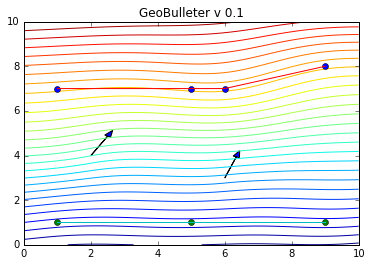

In [758]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(50,50) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

In [443]:
n = 10
#a = T.horizontal_stack(T.vertical_stack(T.ones(n),T.zeros(n)), T.vertical_stack(T.zeros(n), T.ones(n)))
a = T.zeros(n)

print (a.eval())
#U_G = T.horizontal_stack(([T.ones(n),T.zeros(n)],[T.zeros(n),T.ones(n)]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
T.stack?ö+aeg

In [ ]:
_squared_euclidean_distances2 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_Y ** 2).sum(1).reshape(
                (1, aux_Y.shape[0])) - 2 * dips.dot(aux_Y.T))

        _squared_euclidean_distances3 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_X ** 2).sum(1).reshape(
                (1, aux_X.shape[0])) - 2 * dips.dot(aux_X.T))

        h3 = T.vertical_stack(
            (dips[:, 0] - aux_Y[:, 0].reshape((aux_Y[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_Y[:, 1].reshape((aux_Y[:, 1].shape[0], 1))).T
        )


        h4 = T.vertical_stack(
            (dips[:, 0] - aux_X[:, 0].reshape((aux_X[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_X[:, 1].reshape((aux_X[:, 1].shape[0], 1))).T)

        r_3 = T.tile(_squared_euclidean_distances2, (2, 1))  # Careful with the number of dimensions
        r_4 = T.tile(_squared_euclidean_distances3, (2, 1))  # Careful with the number of dimensions

        _ans_d1_3 = (r_3 < self.a) * (
            -7 * (self.a - r_3) ** 3 * r_3 * (8 * self.a ** 2 + 9 * self.a * r_3 + 3 * r_3 ** 2) * 1) 
        / (4 * self.a ** 7)

        _ans_d1_4 = (r_4 < self.a) * (
            -7 * (self.a - r_4) ** 3 * r_4 * (8 * self.a ** 2 + 9 * self.a * r_4 + 3 * r_4 ** 2) * 1) 
        / (4 * self.a ** 7)

        _C_GI = (h3 / r_3 * _ans_d1_3 - h4 / r_4 * _ans_d1_4).T

        self._f_CGI = theano.function([dips, aux_X, aux_Y], _C_GI)